In [30]:
import csv #import csv so i could csvreader but i didnt actually use this
import pandas as pd # pandas to convert my csv to a dataframe
from sklearn.preprocessing import StandardScaler #for normalisation
import numpy as np #
from sklearn.decomposition import PCA # for PCA
import matplotlib.pyplot as plt

Great! trying this out!


(1408, 19144)
7.997666360125873e-18 1.0000000000000009


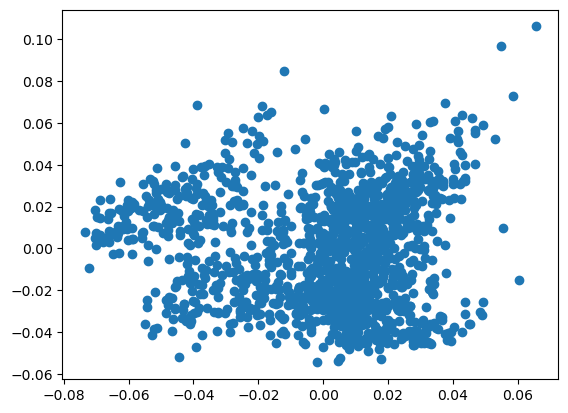

In [31]:
expression = pd.read_csv('/home/alanah/Downloads/Expression_Public_22Q4.csv', index_col=0) #read in gene expression csv as a dataframe, index so it reads in row names
#result = expression.head(10) #test to see if it read in correctly
#print("First 10 rows of the DataFrame:")
#print(result)
#print(expression.iloc[[0]]) # trying the iloc function to see how it works 
column_names = list(expression.columns.values) #extracting the column names
row_names = list(expression.index.values) #extracting rwo names
#print(row_names)


x = expression.iloc[:, ].values #index all the values from the expression datafram, not sure if this is useful
x = StandardScaler().fit_transform(x) # normalizing the features
print(x.shape) #whats the dimensions of the data
print(np.mean(x),np.std(x)) #check mean and stadard deviation of normalised data
#print(type(x))
pca_expression = PCA(n_components=2) #make a PCA q with 2 principal components 
principalComponents_exp = pca_expression.fit_transform(np.transpose(x))
plt.scatter(pca_expression.components_[0,:], pca_expression.components_[1,:]) # plot the PCA as a scatter plot with a component on eah axis
plt.show() # show PCA plot




            A1BG  A1CF  A2M  A2ML1  A3GALT2  A4GALT  A4GNT  AAAS  AACS  AADAC  \
ACH-000001     0     0    0      0        0       0      0     0     0      0   
ACH-000002     0     0    0      0        0       0      0     0     0      0   
ACH-000004     0     0    0      0        0       0      0     0     0      0   
ACH-000005     0     0    0      0        0       0      0     0     0      0   
ACH-000006     0     0    0      0        0       0      0     0     0      0   
ACH-000007     0     0    0      0        0       0      0     0     0      0   
ACH-000008     0     0    0      0        0       0      0     0     0      0   
ACH-000009     0     0    0      0        0       0      0     0     0      0   
ACH-000011     0     0    0      0        0       0      0     0     0      0   
ACH-000012     0     0    0      0        0       0      0     0     0      0   

            ...  ZUP1  ZW10  ZWILCH  ZXDA  ZXDB  ZXDC  ZYG11A  ZYG11B  ZYX  \
ACH-000001  ...     0     0   

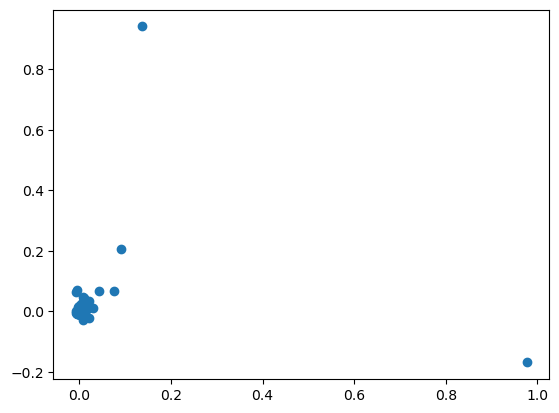

In [32]:
mutation = pd.read_csv('/home/alanah/Downloads/Damaging_Mutations.csv', index_col=0) #read in gene expression csv as a dataframe, index so it reads in row names
result = mutation.head(10) #test to see if it read in correctly
#print("First 10 rows of the DataFrame:")
print(result)
#print(expression.iloc[[0]]) # trying the iloc function to see how it works 
column_names = list(mutation.columns.values) #extracting the column names
row_names_mut = list(mutation.index.values) #extracting rwo names
#print(row_names)

x_mut = mutation.iloc[:, ].values #index all the values from the expression datafram, not sure if this is useful
x_mut = StandardScaler().fit_transform(x_mut) # normalizing the features
#print(x.shape) #whats the dimensions of the data
#print(np.mean(x),np.std(x)) #check mean and stadard deviation of normalised data
#print(type(x))
pca_mutation = PCA(n_components=2) #make a PCA q with 2 principal components 
principalComponents_mut = pca_mutation.fit_transform(np.transpose(x_mut))
#print(len(principalComponents_mut))
plt.scatter(pca_mutation.components_[0,:], pca_mutation.components_[1,:]) # plot the PCA as a scatter plot with a component on eah axis
plt.show() # show PCA plot


In [33]:
print(len(row_names))
print(len(row_names_mut))

overlap_exp  = list()
overlap_mut = list()
for i in range(len(row_names)):     # for each variable in the range of the full length of the row_names list
    if row_names_mut.count(row_names[i])>0: # if the row name in row_names is counted at least once
        overlap_exp.append(i) # append that row_name index to the overlap_exp list
        overlap_mut.append(row_names_mut.index(row_names[i])) # append the index where the row name from row_names appears in row_names_mut
#print(row_names[1:4])
#print(row_names_mut[1:4])
#row_names[1:4] == row_names_mut[1:4]
#print(row_names[(overlap_exp)])
####### find the length of overlap_exp and overlap_mut, chek they are the same######
print(len(overlap_exp))  
print(len(overlap_mut))
#row_names[(overlap_exp)] == row_names_mut[(overlap_mut)]
#print(overlap_exp)
#print(overlap_mut)
#x_exp_overlap = x[overlap_exp,:]
#x_mut_overlap = x_mut[overlap_mut,:]

1408
1701
1359
1359


In [34]:
######### create new dataframesw containing from the main ones, containing only the rows that match those from the overlap lists. .iloc: matching indices to indices as the overlap lists contain the row numbers (the indices) ########

joinable_exp = expression.iloc[overlap_exp]  
#for i in overlap_exp():
#    joinable_exp.append(expression[i])

#print(joinable_exp)
print(len(joinable_exp))

joinable_mut = mutation.iloc[overlap_mut]
print(len(joinable_mut))
#print(joinable_mut)

#print(overlap_exp[1:4])

1359
1359


In [35]:
#### sort the joinable datasets to be inascending order so now they not only contain the same row names but in the same order. for every row in the joinable_mut datasey if the row contains the string '1' basically call it true, if not false. Replace the booleans with strings. Creata a dataframe for these and give the column containing the true or false called Mut.


joinable_exp = joinable_exp.sort_index(ascending=True)
joinable_mut = joinable_mut.sort_index(ascending=True)
damaging_list = joinable_mut.apply(lambda row: row.astype(str).str.contains('1').any(), axis=1, result_type='expand')
damaging_list = damaging_list.replace({True: 'TRUE', False: 'FALSE'})
damaging = pd.DataFrame (damaging_list, columns = ['Mut'])
print(damaging)
#joinable_exp['damaging'] = damaging
print(joinable_exp)


             Mut
ACH-000001  TRUE
ACH-000002  TRUE
ACH-000004  TRUE
ACH-000005  TRUE
ACH-000006  TRUE
...          ...
ACH-002785  TRUE
ACH-002800  TRUE
ACH-002834  TRUE
ACH-002847  TRUE
ACH-002926  TRUE

[1359 rows x 1 columns]
              TSPAN6  TNMD      DPM1     SCYL3  C1orf112       FGR       CFH  \
ACH-000001  5.183487   0.0  7.497612  2.107688  4.217231  0.042644  0.903038   
ACH-000002  0.176323   0.0  5.702103  1.238787  3.119356  4.141596  0.163499   
ACH-000004  2.176323   0.0  5.454505  2.480265  3.921246  0.887525  4.958843   
ACH-000005  2.451541   0.0  5.884842  2.927896  5.299391  0.201634  5.759156   
ACH-000006  0.097611   0.0  6.285032  2.763412  4.192194  3.858976  3.921246   
...              ...   ...       ...       ...       ...       ...       ...   
ACH-002785  0.124328   0.0  8.051644  2.201634  4.043519  0.137504  0.250962   
ACH-002800  5.293518   0.0  6.915521  2.599318  3.058316  0.014355  4.491212   
ACH-002834  5.241840   0.0  7.555663  1.922198  3.6

In [36]:
##### attach the 'mut' column from the damaging dataframe to the joinable expression dataframe in order to be able to colour the data points by whether the cell line has a mutation or not


#joinable_exp.loc['damaging'] = damaging
y = joinable_exp.iloc[:, ].values #index all the values from the expression datafram, not sure if this is useful
y = StandardScaler().fit_transform(y) # normalizing the features
y = pd.DataFrame(data = y)

print(y)
            
 
print(y.shape) #whats the dimensions of the data
print(np.mean(y),np.std(y)) #check mean and stadard deviation of normalised data
#print(type(x))

pca_exp = PCA(n_components=2) #make a PCA q with 2 principal components 
principalComponents_exp_2 = pca_exp.fit_transform(y)
principalComponents_exp_2 = pd.DataFrame(data = principalComponents_exp_2 )
print(pca_exp)
#pca_exp = pd.DataFrame(data = pca_exp )
principalComponents_exp_2 = principalComponents_exp_2.set_index(damaging.index)
#pca_exp= pca_exp.set_index(damaging.index)
principalComponents_exp_2['Damaging'] = damaging
pca_exp['Damaging'] = damaging
print(principalComponents_exp_2)
colours = pca_exp['Damaging']
plt.scatter(pca_exp.components_[0,:], pca_exp.components_[1,:], c=colours) # plot the PCA as a scatter plot with a component on eah axis
plt.show() # show PCA plot






         0         1         2         3         4         5         6      \
0     1.098244 -0.202367  1.539121 -0.469447  0.686013 -0.322128 -0.550577   
1    -1.937399 -0.202367 -1.235502 -2.047876 -0.717653  2.944369 -0.883909   
2    -0.724879 -0.202367 -1.618119  0.207370  0.307588  0.351166  1.277490   
3    -0.558025 -0.202367 -0.953114  1.020528  2.069588 -0.195428  1.638214   
4    -1.985119 -0.202367 -0.334695  0.721728  0.654003  2.719145  0.809815   
...        ...       ...       ...       ...       ...       ...       ...   
1354 -1.968921 -0.202367  2.395273 -0.298787  0.463918 -0.246534 -0.844487   
1355  1.164952 -0.202367  0.639607  0.423638 -0.795694 -0.344672  1.066715   
1356  1.133622 -0.202367  1.628827 -0.806405 -0.084328 -0.225818  0.700210   
1357 -0.280799 -0.202367 -0.232438 -0.122534  0.840051 -0.356112  0.717257   
1358  0.316093 -0.202367  0.722268 -0.445237 -0.713412 -0.356112 -0.938381   

         7         8         9      ...     19134     19135    

/home/alanah/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


PCA(n_components=2)


TypeError: 'PCA' object does not support item assignment